# KELOMPOK 3 - Boston House Prices

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(3)

Using TensorFlow backend.


## Load Data Set

In [3]:
#load data
dataset = pd.read_csv('dataset_dl/boston-housing-prices/housing.csv',delim_whitespace=True,header=None) #ganti sesuai tempat file

In [4]:
dataset.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TARGET']

In [5]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]

## Describe Variable

In [6]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## EDA

In [9]:
import seaborn as sns

In [10]:
corr = dataset.corr()

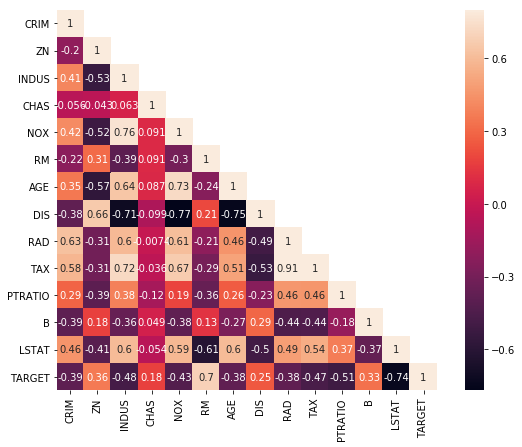

In [11]:
corr2 = np.array(corr)
corr2[np.tril_indices_from(corr2)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, mask=corr2,vmax=.8, square=True,annot=True)

Terdapat 3 variable yang mempunyai korelasi signifikan:
1. RM
2. PTRATIO
3. LSTAT

## Proses Training dengan CV

### Training 13 Feature CV tanpa Scaling

In [ ]:
fkfold = KFold(n_splits=10,shuffle=True,random_state=7)
lossscr=[]
for train, test in fkfold.split(X,Y):
    model=Sequential()
    model.add(Dense(13,input_dim=13,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X[train],Y[train],epochs=150,batch_size=5,verbose=0)
    scores=model.evaluate(X[test],Y[test],verbose=0)
    lossscr.append(scores)
    print("\n%s:%2.f%%"%(model.metrics_names[0],scores))


In [ ]:
print("%.2f(+/- %.2f)"%(np.mean(lossscr1),np.std(lossscr1)))

Menghasilkan Loss 19.46 dan Stdevnya +- 6,90

### Scaling Feature

In [19]:
df = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index,columns=X.columns)

In [21]:
Xdf = df.values
Xdf

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### Training dengan 3 Feature dan CV (Scaling)

In [ ]:
fkfold = KFold(n_splits=10,shuffle=True,random_state=7)
lossscr1=[]
for train, test in fkfold.split(X,Y):
    model=Sequential()
    model.add(Dense(20,input_dim=3,kernel_initializer='normal',activation='relu'))
    model.add(Dense(13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(X[train],Y[train],epochs=150,batch_size=5,verbose=0)
    scores=model.evaluate(X[test],Y[test],verbose=0)
    lossscr1.append(scores)
    print("\n%s:%.2f"%(model.metrics_names[0],scores))

In [ ]:
print("%.2f(+/- %.2f)"%(np.mean(lossscr1),np.std(lossscr1)))

Menghasilkan Loss 19.04 dan Stdevnya +- 13,08

### Training dengan 13 Feature dan CV (Scaling) [BEST]

In [55]:
fkfold = KFold(n_splits=10,shuffle=True,random_state=7)
lossscrtest=[]
lossscrtrain=[]

for train, test in fkfold.split(Xdf,y):
    model= Sequential()
    model.add(Dense(20, input_dim=13,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(13, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal',activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(Xdf[train],y[train],epochs=150,batch_size=5,verbose=0)
    scorestest=model.evaluate(Xdf[test],y[test],verbose=0)
    scorestrain=model.evaluate(Xdf[train],y[train],verbose=0)
    lossscrtest.append(scorestest)
    lossscrtrain.append(scorestrain)
    print("%s: %.2f"%(model.metrics_names[0],scorestest))
    
print("\n%.2f (+/- %.2f)"%(np.mean(lossscrtest),np.std(lossscrtest)))

loss: 7.03
loss: 25.58
loss: 5.67
loss: 10.81
loss: 18.04
loss: 13.81
loss: 11.80
loss: 8.64
loss: 9.78
loss: 8.41

11.96 (+/- 5.65)


Menghasilkan Loss 11.96 dan Stdevnya +- 5.65

## Plotting Validasi vs Training dari Best Model

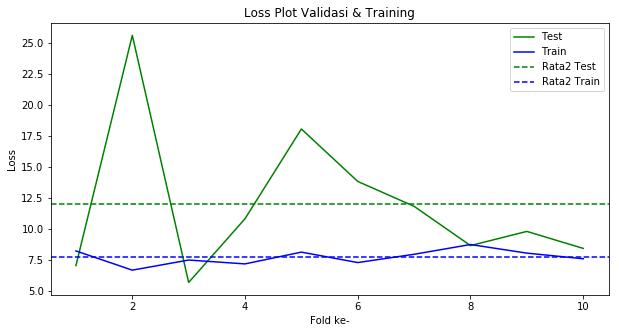

In [64]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(lossscrtest)+1),lossscrtest,color='g')
plt.plot(range(1, len(lossscrtrain)+1),lossscrtrain,color='b')
plt.axhline(np.mean(lossscrtest), color='g',ls='--')
plt.axhline(np.mean(lossscrtrain), color='b',ls='--')
plt.title('Loss Plot Validasi & Training')
plt.ylabel('Loss')
plt.xlabel('Fold ke-')
plt.legend(['Test','Train','Rata2 Test', 'Rata2 Train'])